# Bibliotecas

In [55]:
# Importação das bibliotecas 
import pandas as pd
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import re

# Mostrar todas as colunas de um dataframe 
pd.set_option('display.max_columns', None)



# Preprocessamento
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle



# Visualização inicial dos dados 

In [2]:
# Importação dos dados 
data = pd.read_csv('C:/Python/Desafio/teste_indicium_precificacao.csv')


# Visualização inicial de como os dados estão apresentados no csv 
data.head()


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
# Contagem de Linhas e Colunas
data.shape


(48894, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Considerações:
- Preço: varia de 0 a 10.000 dolares, com média de cerca de 152,72 dolares e mediana de 106 dolares, indicando uma distribuição de preços assimétrica com alguns anúncios muito caros;
- Número mínimo de noites: média de aproximadamente 7 noites, com um máximo de 1250 noites, indicando possíveis outliers ou entradas incomuns;
- Número de reviews: média de 23 reviews por anúncio, mas com grande variação (desvio padrão de aproximadamente 44,55);
- Reviews por mês: média de cerca de 1,37, mas com muitos valores faltantes (conforme analise de missings abaixo);
- Disponibilidade em 365 dias: média de 112,78 dias, indicando que muitos anúncios não estão disponíveis durante todo o ano.

In [6]:
# mean para ver a proporção de missing
data.isna().mean()


id                               0.000000
nome                             0.000327
host_id                          0.000000
host_name                        0.000430
bairro_group                     0.000000
bairro                           0.000000
latitude                         0.000000
longitude                        0.000000
room_type                        0.000000
price                            0.000000
minimo_noites                    0.000000
numero_de_reviews                0.000000
ultima_review                    0.205588
reviews_por_mes                  0.205588
calculado_host_listings_count    0.000000
disponibilidade_365              0.000000
dtype: float64

Percentual relevante de informações faltantes nas colunas de nomes e reviews.

In [7]:
# Conferência de valores faltantes 
missing_values = data.isnull().sum()

# Conferência para colunas categóricas
unique_bairro_group = data['bairro_group'].unique()
unique_room_type = data['room_type'].unique()


missing_values, unique_bairro_group, unique_room_type


(id                                   0
 nome                                16
 host_id                              0
 host_name                           21
 bairro_group                         0
 bairro                               0
 latitude                             0
 longitude                            0
 room_type                            0
 price                                0
 minimo_noites                        0
 numero_de_reviews                    0
 ultima_review                    10052
 reviews_por_mes                  10052
 calculado_host_listings_count        0
 disponibilidade_365                  0
 dtype: int64,
 array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
       dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object))

<function matplotlib.pyplot.show(close=None, block=None)>

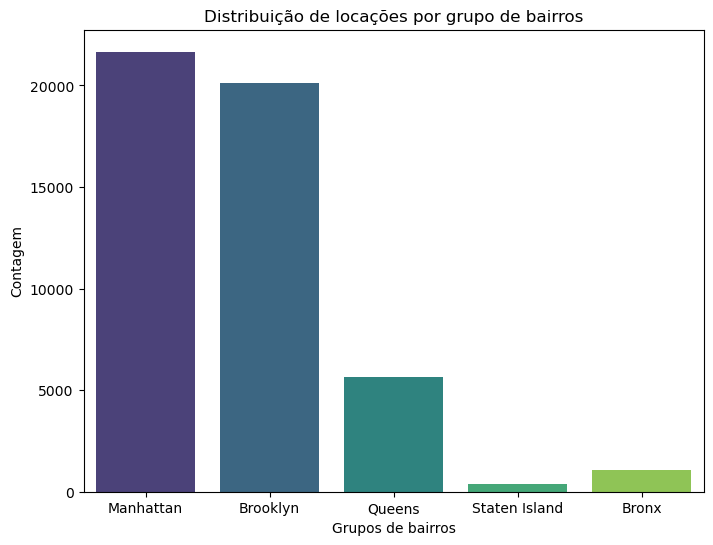

In [8]:
# Análise do tamanho da amostra por categoria 
plt.figure(figsize=(8, 6))
sns.countplot(x='bairro_group', data=data, palette='viridis')

# Adicionando rótulos 
plt.xlabel('Grupos de bairros')
plt.ylabel('Contagem')
plt.title('Distribuição de locações por grupo de bairros',loc='center')

plt.show


Observa-se um grande percentual das locações concentrados em dois grupos de bairros, o que pode ser melhor visualizado no mapa de calor gerado posteriormente.

In [9]:
# Calculando Q1 e Q3 para a coluna 'price'
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Limitação de outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remoção de outliers
data_filtered = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Normalização
median_price = data_filtered['price'].median()
heat_data = [
    [row['latitude'], row['longitude'], row['price'] / median_price]
    for index, row in data_filtered.iterrows()
]

# Criação do mapa de calor
mapa = folium.Map(location=[data_filtered['latitude'].mean(), data_filtered['longitude'].mean()], zoom_start=10)
HeatMap(heat_data).add_to(mapa)

# Salvando o mapa em um arquivo HTML
mapa_path = 'mapa_de_calor_mediana.html'
mapa.save(mapa_path)

mapa_path



'mapa_de_calor_mediana.html'

Foi realizada uma normalização dos dados especificamente para o mapa de calor, possibilitando que fosse possível visualizar melhor as nuances de flutuações de preços no mapa, já que o mesmo é muito sensível aos outliers.
O mapa de calor possibilita uma visualização mais dinamica dos preços na região, podendo tambem explorar a densidade das locações. 

# Onde seria mais indicada a compra?


Primeiro foram feitos agrupamentos para a visualização dos 3 principais pontos que respondem a pergunta. Dessa maneira foram possíveis obter as informações de preço médio por tipo de quarto/bairro e taxa de ocupação por tipo de quarto/bairro. 

In [11]:
# Agrupando por 'bairro_group' e 'room_type' 
grouped_rooms = data.groupby(['bairro_group', 'room_type']).agg(
    avg_price=('price', 'mean'),
    total_reviews=('numero_de_reviews', 'sum'),
    avg_availability_365=('disponibilidade_365', 'mean')
).reset_index()

# Ordenando por 'bairro_group' e preço médio
grouped_rooms = grouped_rooms.sort_values(by=['bairro_group', 'avg_price'], ascending=[True, False])

print(grouped_rooms)

     bairro_group        room_type   avg_price  total_reviews  \
0           Bronx  Entire home/apt  127.506596          11627   
1           Bronx     Private room   66.788344          16312   
2           Bronx      Shared room   59.800000            432   
3        Brooklyn  Entire home/apt  178.327545         267128   
4        Brooklyn     Private room   76.492942         213644   
5        Brooklyn      Shared room   50.527845           5793   
6       Manhattan  Entire home/apt  249.239109         235147   
7       Manhattan     Private room  116.776622         209150   
8       Manhattan      Shared room   88.977083          10272   
9          Queens  Entire home/apt  147.050573          60644   
10         Queens     Private room   71.762456          93561   
11         Queens      Shared room   69.020202           2745   
12  Staten Island  Entire home/apt  173.846591           5857   
13  Staten Island     Private room   62.292553           5670   
14  Staten Island      Sh

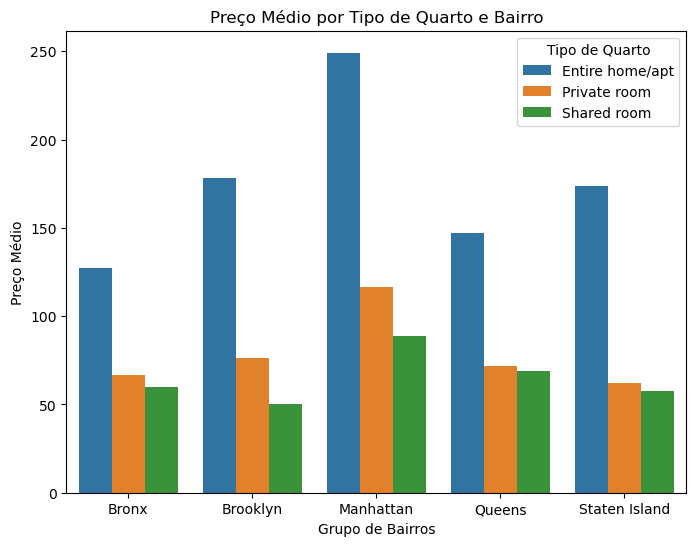

In [12]:
# Gráfico para visualização do preço médio
plt.figure(figsize=(8, 6)) 
sns.barplot(x='bairro_group', y='avg_price', hue='room_type', data=grouped_rooms)
plt.title('Preço Médio por Tipo de Quarto e Bairro')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço Médio')
plt.legend(title='Tipo de Quarto')
plt.show()

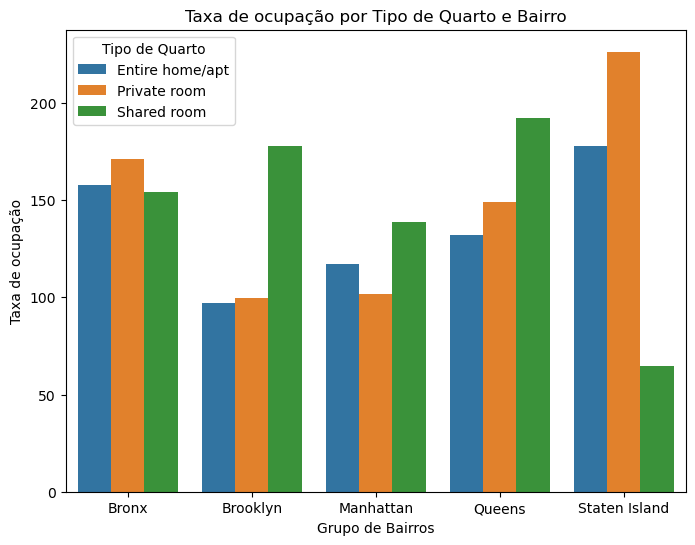

In [13]:
# Gráfico para visualização do preço médio
plt.figure(figsize=(8, 6)) 
sns.barplot(x='bairro_group', y='avg_availability_365', hue='room_type', data=grouped_rooms)
plt.title('Taxa de ocupação por Tipo de Quarto e Bairro')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Taxa de ocupação')
plt.legend(title='Tipo de Quarto')
plt.show()

Considerações:
- Os apartamentos inteiros (Entire home/apt) são mais caros em todos os grupos de bairros;
- Os quartos privados (Private room) são mais baratos do que os apartamentos inteiros, mas são mais caros do que os quartos compartilhados ("Shared room"). Por consequência, os quartos compartilhados são mais baratos em todos os grupos de bairros;
- Há  variação  na taxa de ocupação entre os diferentes tipos de quarto dentro de cada bairro. No Bronx e no Queens os quartos compartilhados tem taxas de ocupação mais baixas em comparação com apartamentos e quartos privados;
- Em Manhattan a diferença na taxa de ocupação entre os tipos de quartos não é tão grande, ou seja, a demanda é mais uniforme.

Diante disso, optou-se por seguir com a análise somente dos apartamentos inteiros 'Entire home/apt'.


In [14]:
# Filtragem dos dados para "Entire home/apt"
entire_home_data = data[data['room_type'] == 'Entire home/apt']

grouped_data = entire_home_data.groupby('bairro_group').agg(
    avg_price=('price', 'mean'),
    total_reviews=('numero_de_reviews', 'sum'),
    avg_availability_365=('disponibilidade_365', 'mean')
).reset_index()

# Ordenando por 'bairro_group' e preço médio 
grouped_data = grouped_data.sort_values(by=['avg_price', 'total_reviews'], ascending=[False, False])

grouped_data

,bairro_group,avg_price,total_reviews,avg_availability_365
2,Manhattan,249.239109,235147,117.140996
1,Brooklyn,178.327545,267128,97.205147
4,Staten Island,173.846591,5857,178.073864
3,Queens,147.050573,60644,132.267176
0,Bronx,127.506596,11627,158.000000


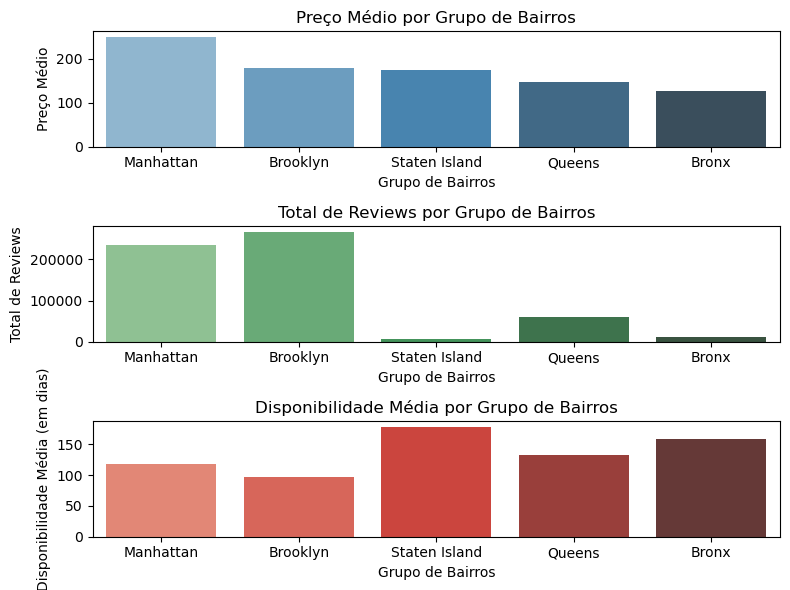

In [15]:
# Plotando o gráfico
plt.figure(figsize=(8, 6))

# Gráfico de barras para preço médio
plt.subplot(3, 1, 1)
sns.barplot(x='bairro_group', y='avg_price', data=grouped_data, palette='Blues_d')
plt.title('Preço Médio por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Preço Médio')

# Gráfico de barras para total de reviews
plt.subplot(3, 1, 2)
sns.barplot(x='bairro_group', y='total_reviews', data=grouped_data, palette='Greens_d')
plt.title('Total de Reviews por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Total de Reviews')

# Gráfico de barras para disponibilidade média
plt.subplot(3, 1, 3)
sns.barplot(x='bairro_group', y='avg_availability_365', data=grouped_data, palette='Reds_d')
plt.title('Disponibilidade Média por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Disponibilidade Média (em dias)')

plt.tight_layout() 
plt.show()



Considerações:
- Se o objetivo é maximizar o retorno financeiro com base em alta demanda e preços de aluguel, Manhattan pode ser a melhor escolha, no entanto, exige um investimento inicial mais alto.
- Brooklyn é uma opção alternativa, pois apresenta um equilíbrio entre acessibilidade financeira (custo do investimento) e alta demanda.
- Já investimentos em outros bairros podem ser considerados para estratégias de investimento mais focadas em longo prazo ou com um orçamento mais limitado

# O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Era necessário primeiro identificar quais eram os valores únicos de locações de quartos.

In [16]:
data.minimo_noites.unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36],
      dtype=int64)

Considerando a quantidade de valores, foi escolhida a nota de corte de ao menos 500 locações do valor minimo de noite locada como base para análise.

In [17]:
# Calculando a contagem de valores para a coluna 'minimo_noites' 
minimo_noites_counts = data['minimo_noites'].value_counts()

# Definindo um corte de frequência mínima
cutoff_frequency = 500
minimo_noites_frequent = minimo_noites_counts[minimo_noites_counts >= cutoff_frequency].index.tolist()

# Filtrando o conjunto de dados original 
data_filtered_minimo_noites = data[data['minimo_noites'].isin(minimo_noites_frequent)]

# Verificando as primeiras entradas do conjunto de dados filtrado
data_filtered_minimo_noites.head()



,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [60]:
Plotagem do gráfico para melhor visualização das informações de locações por quarto.

SyntaxError: invalid syntax (2966703320.py, line 1)

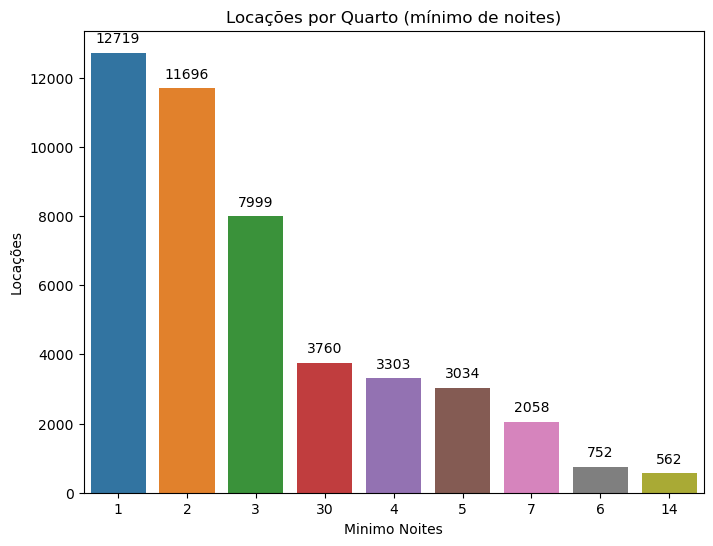

In [59]:
# Gráfico em barras
plt.figure(figsize=(8,6))
ax = sns.countplot(x='minimo_noites', data=data_filtered_minimo_noites, order=minimo_noites_frequent)

# Rótulos nas barras com os valores de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Definição de rótulos
ax.set_xlabel('Minimo Noites')
ax.set_ylabel('Locações')
ax.set_title('Locações por Quarto (mínimo de noites)')
plt.show()




Considerações: 
- A barra mais alta indica mostra que existe uma preferência de locação mínima de uma noite, sugerindo uma forte preferência por estadias curtas, possivelmente para viagens de negócios e turismo de curto prazo;

Desta maneira foi realizada a plotagem dos preços médios por quarto considerando o mínimo de noites analisado.

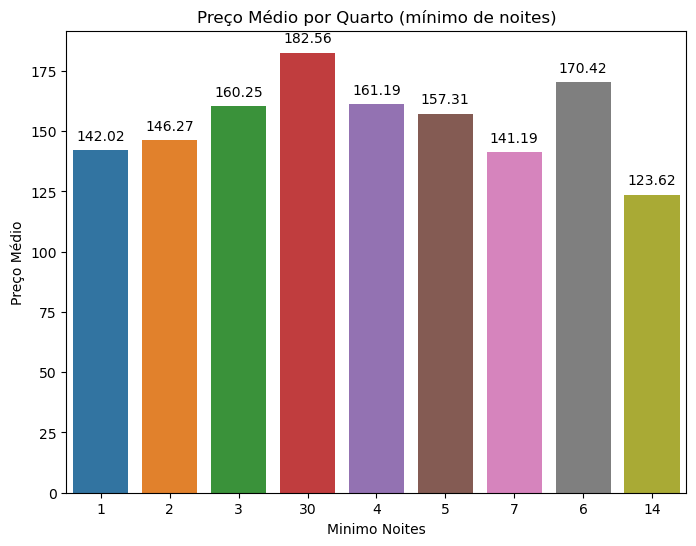

In [19]:
# Calculo do preço médio
average_price_per_minimo_noites = data_filtered_minimo_noites.groupby('minimo_noites')['price'].mean().reset_index()
average_price_per_minimo_noites = average_price_per_minimo_noites.sort_values('minimo_noites')

# Gráfico comparativo
plt.figure(figsize=(8,6))
ax = sns.barplot(x='minimo_noites', y='price', data=average_price_per_minimo_noites, order=minimo_noites_frequent)

# Rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Definição dos rótulos
ax.set_xlabel('Minimo Noites')
ax.set_ylabel('Preço Médio')
ax.set_title('Preço Médio por Quarto (mínimo de noites)')

# Mostrar o gráfico
plt.show()



Considerações:
- As estadias de uma noite têm o preço médio mais baixo, o que pode ser atraente para viajantes de curto prazo;
- O preço médio aumenta ligeiramente para duas e três noites, mas depois vemos uma variação para estadias de 4 a 7 noites; 
- Existe uma variação significativa nos preços médios, com a categoria de 7 noites apresentando um preço médio menor do que as categorias adjacentes de 5 e 6 noites. Isso pode indicar promoções específicas ou uma menor demanda que leva a preços mais competitivos para essa duração específica de estadia;
- A categoria de 30 noites tem o preço médio mais alto, sugerindo que os imóveis disponíveis para estadias mais longas podem ser de qualidade superior ou em locais mais demandados.

Assim: confirma-se que o número mínimo de noites interfere no preço.

# Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Processo:
- Primeiro foi necessário fazer a limpeza e tokenização dos nomes, considerando palavras acima de 3 letras, evitando muitas palavras de conexão como 'and', 'is/in' entre outras;
- Foi necessário estabelecer o quartil mais alto de preço, já que a pergunta abordava analisar os lugares de mais alto valor e realizar a contagem dos tokens

In [20]:
# Função para limpeza e tokenização considerando tokens com mais de 3 letras
def clean_and_tokenize_v3(name):
    tokens = re.findall(r'\b\w{4,}\b', name.lower())
    return tokens

# Filtrar os locais com preços no quartil superior
high_value_places = data[data['price'] > data['price'].quantile(0.75)]

# Aplicar a função de limpeza e tokenização aos nomes dos locais de alto valor
high_value_places = high_value_places.dropna(subset=['nome'])
high_value_places['tokens'] = high_value_places['nome'].apply(clean_and_tokenize_v3)

# Contar a frequência de cada token
high_value_token_counts = Counter(token for tokens in high_value_places['tokens'] for token in tokens)

# Obter os tokens mais comuns em locais de alto valor
most_common_high_value_tokens = high_value_token_counts.most_common(20)

most_common_high_value_tokens


[('bedroom', 1916),
 ('apartment', 1802),
 ('village', 1070),
 ('studio', 1021),
 ('east', 1004),
 ('luxury', 950),
 ('park', 913),
 ('loft', 891),
 ('spacious', 877),
 ('with', 828),
 ('manhattan', 825),
 ('west', 767),
 ('williamsburg', 692),
 ('private', 677),
 ('brooklyn', 661),
 ('midtown', 622),
 ('central', 622),
 ('heart', 617),
 ('modern', 604),
 ('beautiful', 587)]

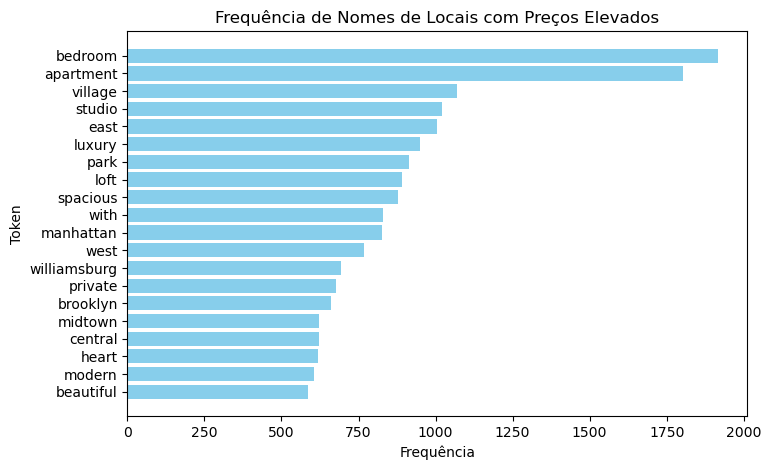

In [21]:
# Criar o gráfico de barras
tokens, frequencies = zip(*most_common_high_value_tokens)
plt.figure(figsize=(8, 5))
plt.barh(tokens, frequencies, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Token')
plt.title('Frequência de Nomes de Locais com Preços Elevados')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a barra mais longa esteja no topo
plt.show()



Considerações:
- Os termos mais frequentes no gráfico destacam os tipos de acomodações (como 'apartment', 'studio', 'loft'), localizações (como 'village', 'east', 'manhattan', 'williamsburg', 'brooklyn', 'midtown', 'central'), e qualidades descritivas ou de luxo (como 'luxury', 'spacious', 'private', 'modern', 'beautiful'). Esses termos são usados para atrair hóspedes que valorizam essas características específicas.

Para a seguinte analise serão analisadas palavras específicas, descartando-se palavras descritivas como tipo de acomodação, proposições ('with') e nomes dos bairros (brooklyn, manhattan). 

Desta maneira serão analisados a média dos preços com a palavra e sem a palavra no grupo de dados analisado.

In [38]:
# Termos selecionados para a análise
selected_terms = ['village','east','luxury','park','spacious','west','williamsburg','private','midtown','central','heart','modern','beautiful']


def calculate_price_based_on_term(df, term):
    # Verificar se o termo está presente no nome
    has_term = df['nome'].str.contains(term, case=False, na=False)
    
    # Calcular o preço médio 
    avg_price_with_term = df.loc[has_term, 'price'].mean()
    avg_price_without_term = df.loc[~has_term, 'price'].mean()
    
    return avg_price_with_term, avg_price_without_term

# Dicionário para armazenar os resultados
price_differences_with_arg = {}

# Calcular o preço médio 
for term in selected_terms:
    avg_price_with, avg_price_without = calculate_price_based_on_term(data, term)
    price_differences_with_arg[term] = {
        'avg_price_with_term': avg_price_with,
        'avg_price_without_term': avg_price_without
    }

# Mostrar os resultados
price_differences_with_arg




{'village': {'avg_price_with_term': 205.78541136556404,
  'avg_price_without_term': 150.03195375623173},
 'east': {'avg_price_with_term': 173.7783078880407,
  'avg_price_without_term': 151.2736612021858},
 'luxury': {'avg_price_with_term': 271.5721769499418,
  'avg_price_without_term': 148.39257249448872},
 'park': {'avg_price_with_term': 165.14285714285714,
  'avg_price_without_term': 151.78152979739093},
 'spacious': {'avg_price_with_term': 139.315,
  'avg_price_without_term': 153.85044573557457},
 'west': {'avg_price_with_term': 212.67620206938528,
  'avg_price_without_term': 150.63600770354066},
 'williamsburg': {'avg_price_with_term': 144.5832727272727,
  'avg_price_without_term': 153.20572555478503},
 'private': {'avg_price_with_term': 105.38458384583846,
  'avg_price_without_term': 161.05130240277077},
 'midtown': {'avg_price_with_term': 221.30146491904395,
  'avg_price_without_term': 150.851965460008},
 'central': {'avg_price_with_term': 177.91997907949792,
  'avg_price_without

Para uma melhor visualização das informações obtidas, foi realizada a plotagem dos dados, fazendo um comparativo por termo, considerando os valores com a presença do termo e sem a presença dele na análise. 

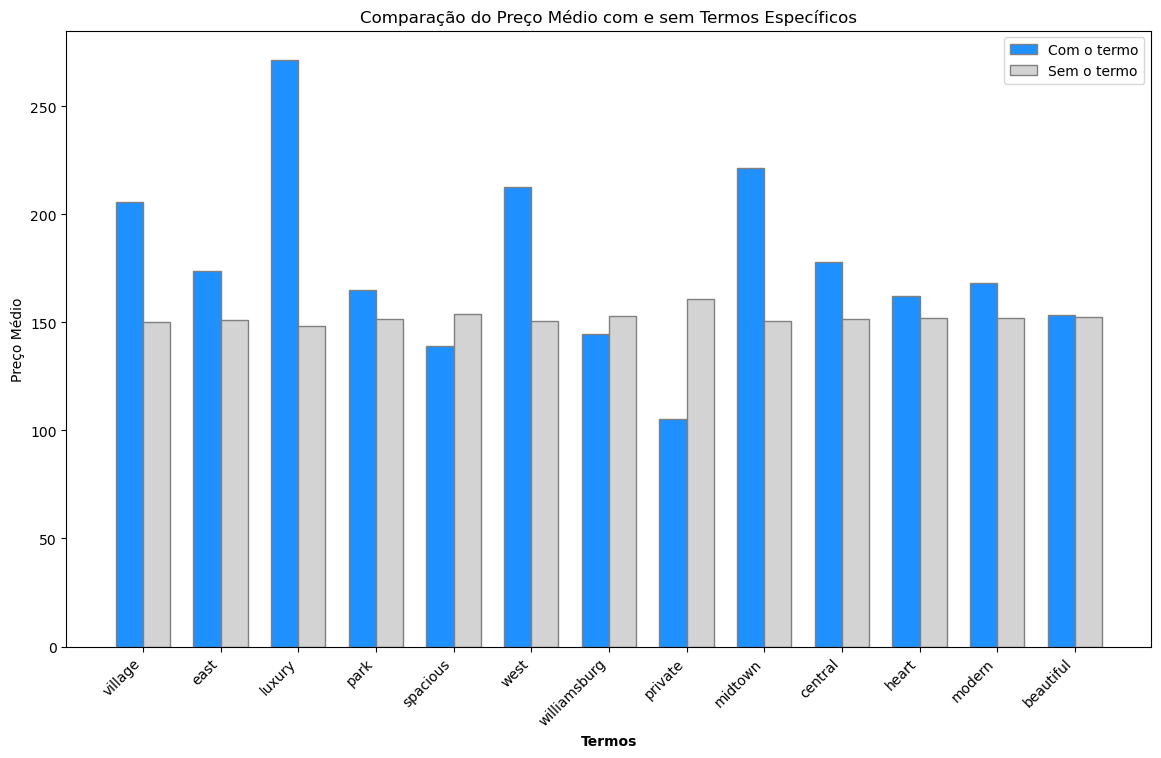

In [40]:
# Extrair tokens e as diferenças de preço para plotar
tokens = list(price_differences_with_arg.keys())
avg_prices_with = [price_differences_with_arg[token]['avg_price_with_term'] for token in tokens]
avg_prices_without = [price_differences_with_arg[token]['avg_price_without_term'] for token in tokens]

# Definir a localização das barras no eixo X
bar_width = 0.35
r1 = np.arange(len(tokens))
r2 = [x + bar_width for x in r1]

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(r1, avg_prices_with, width=bar_width, color='dodgerblue', edgecolor='grey', label='Com o termo')
plt.bar(r2, avg_prices_without, width=bar_width, color='lightgrey', edgecolor='grey', label='Sem o termo')

# Adicionar legendas e títulos
plt.xlabel('Termos', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(tokens))], tokens, rotation=45, ha='right')
plt.ylabel('Preço Médio')
plt.title('Comparação do Preço Médio com e sem Termos Específicos')

# Criar legenda e mostrar o gráfico
plt.legend()
plt.show()



Considerações: 

- O token luxury tem o maior impacto positivo no preço médio quando comparado com as listagens sem o termo, mostrando que a palavra "luxury" no nome pode ser um forte indicador de um preço mais alto;
- Tokens como village, west e midtown também mostram um aumento considerável no preço médio ao aparecerem nos nomes das locações;
- A presença de tokens específicos nos nomes aparenta ter uma relação direta com preços mais altos, especialmente quando esses tokens sugerem luxo ou uma localização desejável;
- Os donos dos imóveis se beneficiam ao enfatizar características específicas ou localizações em seus anúncios para potencialmente comandar preços mais altos.

# Previsão de preços

## Tratamento de dados

 Processo:
- Para reviews_por_mes os valores ausentes foram preenchidos com 0, assumindo que a ausência de reviews significa que não houve nenhum review no período;
- Para os dados que são menos relevantes para a previsão como em 'nome' e 'host_name', foram preenchidos com o marcador "Desconhecido";
- Remoção das locações com preços além de certos percentis (acima do 99º percentil).

In [41]:
# Tratamento de valores ausentes
data['reviews_por_mes'].fillna(0, inplace=True)

# Para `nome` e `host_name`, podemos preencher com "Desconhecido"
data['nome'].fillna('Desconhecido', inplace=True)
data['host_name'].fillna('Desconhecido', inplace=True)

# Remoção de outliers baseada na distribuição de preços
price_percentiles = np.percentile(data['price'], [1, 99])

# Visualizar os percentis
price_percentiles


array([ 30., 799.])

A análise dos percentis de preços mostra que 1% das listagens possuem preços abaixo de 30 dólares e 1% têm preços acima de $799. São removidos locações que  estão fora desses limites para reduzir o impacto de outliers nos preços.



In [42]:
# Remoção de outliers de preço
data_filtered = data[(data['price'] >= 30) & (data['price'] <= 799)]

# Converção de variáveis categóricas 
categorical_features = ['bairro_group', 'room_type']
data_prepared = pd.get_dummies(data_filtered, columns=categorical_features, drop_first=True)

data_prepared.head()


,id,nome,host_id,host_name,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Private room,room_type_Shared room
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,False,True,False,False,False,False
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaN,0.00,1,365,False,True,False,False,True,False
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,True,False,False,False,False,False
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,False,True,False,False,False,False
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,False,True,False,False,False,False


As variáveis categóricas bairro_group e room_type foram convertidas em variáveis dummy/indicadoras.

In [43]:
# Selecionando as características
X = data_prepared.drop(['id', 'nome', 'host_id', 'host_name', 'bairro', 'latitude', 'longitude', 'price', 'ultima_review'], axis=1)
y = data_prepared['price']

# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((38412, 11), (9604, 11), (38412,), (9604,))

Os dados foram divididos em conjuntos de treinamento e teste, com 38.412 instâncias para treinamento e 9.604 para teste. Cada instância possui 11 características após a seleção e preparação.

In [53]:
# Treinamento do modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Previsão dos preços no conjunto de teste
y_pred = lr_model.predict(X_test)

# Avaliação do modelo usando RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse


81.72845692854501

O modelo de Regressão Linear foi treinado e avaliado, resultando em um RMSE de $81.73 no conjunto de teste.
Abaixo foi feito o input para os dados do desafios, incluindo na ordem necessária para a realização da predição.

In [54]:
# Dados de entrada para teste
input_data = {
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355],
    'bairro_group_Brooklyn': [0],
    'bairro_group_Manhattan': [1],  
    'bairro_group_Queens': [0],
    'bairro_group_Staten Island': [0],
    'room_type_Private room': [0], 
    'room_type_Shared room': [0]
}


# Convertendo os dados de entrada em um DataFrame
input_df = pd.DataFrame.from_dict(input_data)

# Previsão de preço para a entrada fornecida
predicted_price = lr_model.predict(input_df)

predicted_price[0]


239.97614102731876

Consideração:
O percentual de erro entre o preço previsto (239,98) e o preço real ($225) é de aproximadamente 6,66%.

In [58]:
# salvar modelo
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)
